In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Sales = pd.read_csv('vgsales.csv')

# 数据清洗

In [4]:
Sales.shape

(16598, 11)

In [5]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
Sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 查看Genre和Platform之间的关系

Text(0, 0.5, 'Platform')

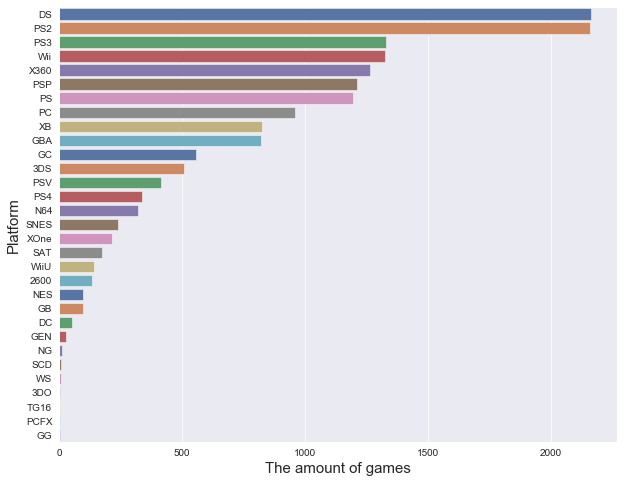

In [177]:
# 绘制交叉表
Genre_Platform = pd.crosstab(Sales.Platform, Sales.Genre)

# 求各platform下的游戏总数，生成Series
Genre_sum = Genre_Platform.sum(axis=1).sort_values(ascending=False)

# 绘制柱状图
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.barplot(y=Genre_sum.index, x=Genre_sum.values, orient='h', palette='deep')
plt.xlabel('The amount of games', fontsize=15)
plt.ylabel('Platform', fontsize=15)

# 筛选出数量大于1000的platform，做heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

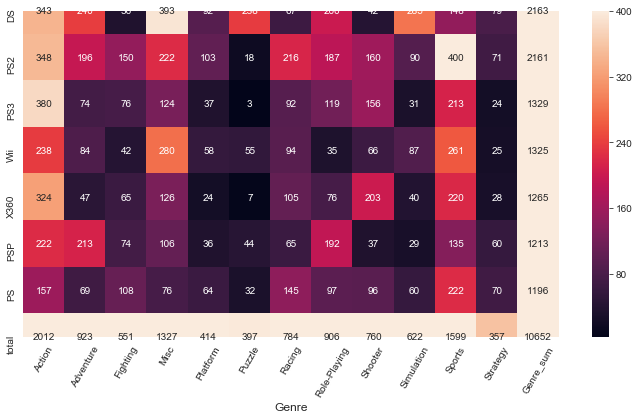

In [178]:
Genre_Platform['Genre_sum'] = Genre_Platform.sum(axis=1)
pop_platform = Genre_Platform[Genre_Platform['Genre_sum']>1000].sort_values('Genre_sum', ascending=False)
df1 = pop_platform.loc[:, :'Strategy']
mini = df1.values.min()
maxi = df1.values.max()
pop_platform_final = pop_platform.append(pd.DataFrame(pop_platform.sum(), columns=['total']).T)
plt.figure(figsize=(12, 6))
sns.heatmap(pop_platform_final, vmin=mini, vmax=maxi, annot=True, fmt='d')
plt.xticks(rotation=60)

# Genre和Area的分析

Text(0.5, 1, 'Comparison of each area in each Genre(Pencentage)')

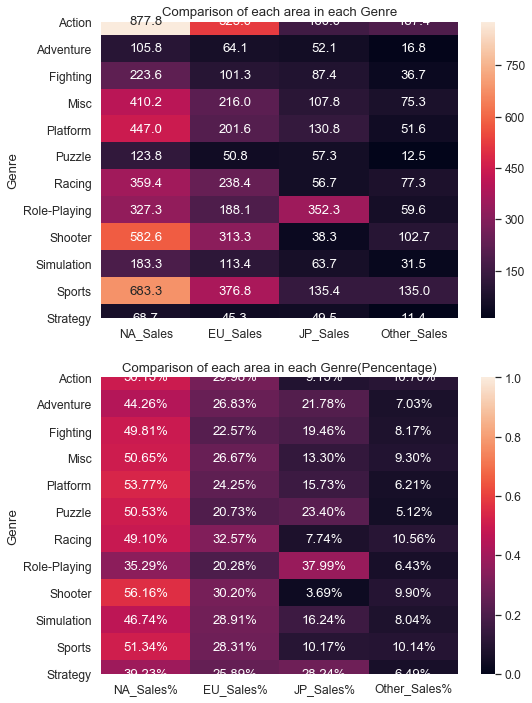

In [204]:
genre_group = Sales.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
genre_group['NA_Sales%'] = genre_group['NA_Sales']/genre_group['Global_Sales']
genre_group['EU_Sales%'] = genre_group['EU_Sales']/genre_group['Global_Sales']
genre_group['JP_Sales%'] = genre_group['JP_Sales']/genre_group['Global_Sales']
genre_group['Other_Sales%'] = genre_group['Other_Sales']/genre_group['Global_Sales']
sns.set(font_scale=1.1)
plt.figure(figsize=(8, 12))
plt.subplot(2,1,1)
sns.heatmap(genre_group.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt='.1f')
plt.title('Comparison of each area in each Genre')
plt.subplot(2,1,2)
sns.heatmap(genre_group.loc[:, 'NA_Sales%':'Other_Sales%'], vmin=0, vmax=1, annot=True, fmt='.2%')
plt.title('Comparison of each area in each Genre(Pencentage)')